# Stage 2 Kelompok 259
# Data Preprocessing

## 1. Data Cleansing

In [250]:
!pip install -U imbalanced-learn

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
import warnings
warnings.filterwarnings('ignore')

### 1.1. Original Data

In [161]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [162]:
#pengelompokan kolom
cats = ['CustomerID','Churn','CityTier','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain']
nums = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress'
            ,'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

### 1.2 Value Ganda

#### Identifikasi Value Ganda
Pada data yang bersifat kategorikal, beberpa value yang terindikasi ganda/maksudnya sama adalah:
- Fitur PreferredPaymentMode memiliki  value 'CC' yang sama maksudnya dengan 'Cash on Delivery' dan 'COD' yang sama maksudnya dengan 'Cash on Delivery'
- Fitur PreferredLoginDevice memiliki value 'Mobile Phone' yang maksudnya sama dengan 'Phone'
- Fitur PreferedOrderCat memiliki value 'Mobile Phone' yang maksudnya sama dengan 'Mobile'

In [163]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom CustomerID:
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery      

#### Merge Value Ganda

In [201]:
# df1= data yang sudah memiliki value unik pada fitur kategorikal
df1 = df.copy()
df1.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df1.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df1.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'
df1.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [235]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df1[col].value_counts())
    print()

Value count kolom CustomerID:
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom M

In [237]:
#cek value Duplicate
df1['CustomerID'].duplicated().sum()

0

### 1.3. Feature Encoding

#### Analisis
Pada dataset,fitur yang bertipe kategorikal ada 5 yaitu:
 - PreferredLoginDevice (nominal - 2 nilai unik)
 - PreferredPaymentMode (nominal - 5 nilai unik)
 - Gender (nominal - 2 nilai unik)
 - PreferedOrderCat (nominal - 5 nilai unik)
 - MaritalStatus (nominal - 3 nilai unik)
 
Untuk yang bersifat nominal dan hanya memiliki 2 nilai unik, akan dilakukan label encoding
 - Gender : 1= Male; 0=Female
 - PreferredLoginDevice : 1= Mobile Phone; 0=Computer
 
Untuk yang bersifat nominal dan memiliki lebih dari 2 nilai unik, akan dilakukan one hot encoding:
 - PreferredPaymentMode
 - PreferedOrderCat
 - MaritalStatus

#### Label Encoding dan One-Hot Encoding

In [205]:
label=['Gender','PreferredLoginDevice']
hot=['PreferredPaymentMode','PreferedOrderCat','MaritalStatus']
df2 = df1.copy()

# label encoder pada ['Gender','PreferredLoginDevice']
for cat in label:
    df2[cat] = df2[cat].astype('category').cat.codes
    
# one hot encoding pada ['PreferredPaymentMode','PreferedOrderCat','MaritalStatus']
for cat in hot:
    onehots = pd.get_dummies(df2[cat], prefix=cat)
    df2 = df2.join(onehots)

df2 = df2.drop(columns=hot).copy()
# df2= data yang sudah memiliki value unik pada fitur kategorikal dan sudah di encoding

In [257]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5630 non-null   int64  
 1   Churn                                  5630 non-null   int64  
 2   Tenure                                 5366 non-null   float64
 3   PreferredLoginDevice                   5630 non-null   int8   
 4   CityTier                               5630 non-null   int64  
 5   WarehouseToHome                        5379 non-null   float64
 6   Gender                                 5630 non-null   int8   
 7   HourSpendOnApp                         5375 non-null   float64
 8   NumberOfDeviceRegistered               5630 non-null   int64  
 9   SatisfactionScore                      5630 non-null   int64  
 10  NumberOfAddress                        5630 non-null   int64  
 11  Comp

### 1.4. Handling Missing Value

#### Identifikasi Missing Value
Total ada 1.856 missing values, dan juga ada 1.856 rows dengan missing values, artinya setiap missing values berada pada row yang berbeda, dan tidak ada rows yang memiliki lebih dari satu missing values.
<br>
Jadi jika kita drop semua rows dengan missing values, kita akan membuang 1856 rows atau 32,97 persen dari dataset dan akan menyebabkan data loss, sehingga treatment yang paling tepat adalah dengan imputation

In [207]:
sum_missing = df2.isna().sum()
percent_missing = round(df2.isna().sum() * 100 / len(df2),2)
missing_value_df2 = pd.DataFrame({'column_name': df2.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
print(f'The number of missing values: {df2.isnull().sum().sum()}')
print(f'The number of rows with missing values: {df2[df2.isna().any(axis=1)].shape[0]}')
print(f'Percentage rows with missing values: {(df2[df2.isna().any(axis=1)].shape[0])/df2.shape[0]}')
missing_value_df2

The number of missing values: 1856
The number of rows with missing values: 1856
Percentage rows with missing values: 0.32966252220248665


,column_name,sum_missing,percent_missing
0,CustomerID,0,0.00
1,Churn,0,0.00
2,Tenure,264,4.69
3,PreferredLoginDevice,0,0.00
4,CityTier,0,0.00
5,WarehouseToHome,251,4.46
6,Gender,0,0.00
7,HourSpendOnApp,255,4.53
8,NumberOfDeviceRegistered,0,0.00
9,SatisfactionScore,0,0.00


#### Imputasi Missing Value
Imputasi missing value dilakukan dengan nilai median karena sifat data yang skewed pada fitur-fitur yang memiliki missing value

In [208]:
#df3= data yang sudah tidak ada missing value
df3 = df2.copy()
imputer = SimpleImputer(strategy= 'median')      
imputer.fit(df3[nums])
df3[nums] = imputer.transform(df3[nums])

In [209]:
df3.isna().sum()

CustomerID                               0
Churn                                    0
Tenure                                   0
PreferredLoginDevice                     0
CityTier                                 0
WarehouseToHome                          0
Gender                                   0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
NumberOfAddress                          0
Complain                                 0
OrderAmountHikeFromlastYear              0
CouponUsed                               0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
PreferedOrderCat_Fashion                 0
PreferedOrd

### 1.5. Handling Outliers

#### Analisis Outlier
Pada data bertipe numerical, terdapat data-data yang teridentifikasi sebagai outlier, terlihat pada boxplot berikut

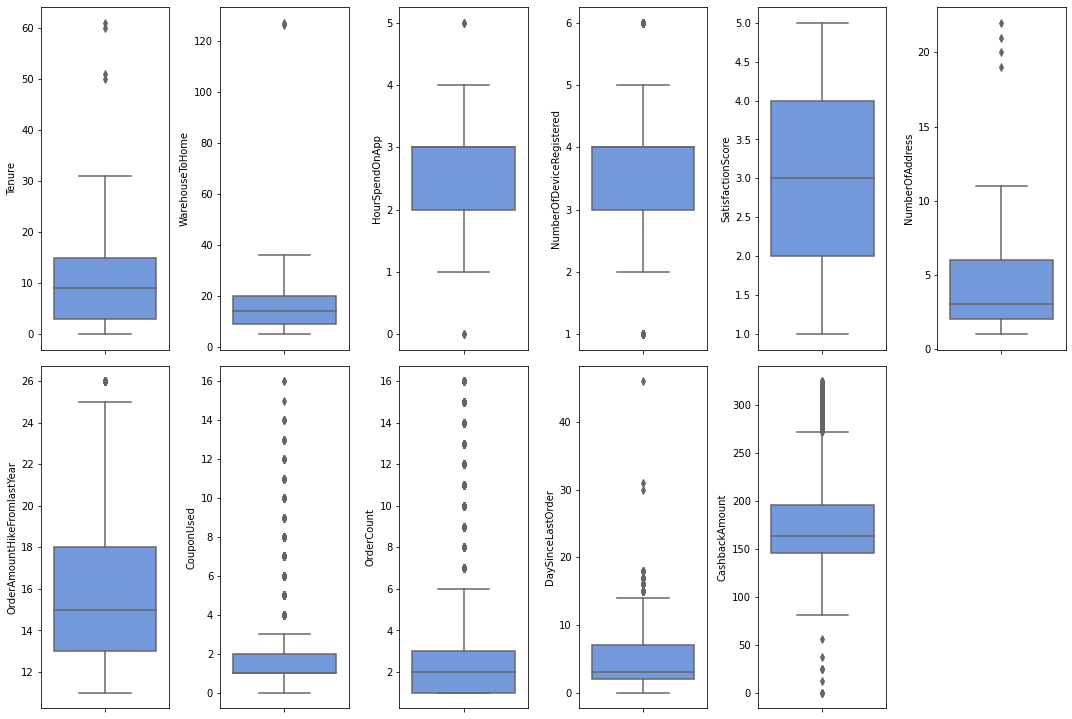

In [210]:
#df4= data yang masih memiliki outliers
df4 = df3.copy()
plt.figure(figsize=(15,20))
for i in range(0, len(nums)):
    plt.subplot(4, 6, i+1)
    sns.boxplot(y=df4[nums[i]], color='cornflowerblue', orient='v')
    plt.tight_layout()

#### Remove Outliers dengan Z-Score

In [211]:
#df4_1= data yang diremove outlier menggunakan z-score
df4_1 = df4.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df4_1)}')
filtered_entries = np.array([True] * len(df4_1))
for col in nums:
    zscore = abs(stats.zscore(df4_1[col]))
    filtered_entries = (zscore < 3) & filtered_entries
df4_1 = df4_1[filtered_entries]
print(f'Jumlah baris sebelum memfilter outlier: {len(df4_1)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris sebelum memfilter outlier: 5350


#### Remove Outliers dengan IQR

In [212]:
#df4_1= data yang diremove outlier menggunakan IQR
df4_2 = df4.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df4_2)}')

filtered_entries = np.array([True] * len(df4_2))
for col in nums:
    Q1 = df4_2[col].quantile(0.25)
    Q3 = df4_2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df4_2[col] >= low_limit) & (df4_2[col] <= high_limit)) & filtered_entries
    
df4_2 = df4_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df4_2)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 4048


### 1.6. Data Transformation

#### Data Outliers

##### Plot Distribusi Data Numerik

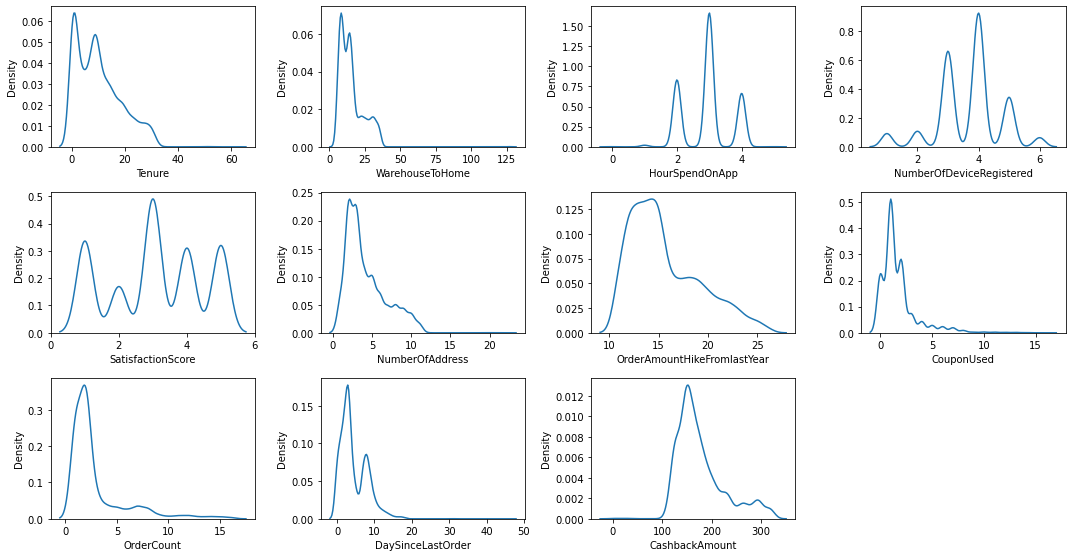

In [327]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df4[i])
    plt.tight_layout()

##### Data Outlier - Log

In [328]:
df5 = df4.copy()
df5_log = df5.copy()
for i in nums:
    df5_log[i]=np.log(df5[i])

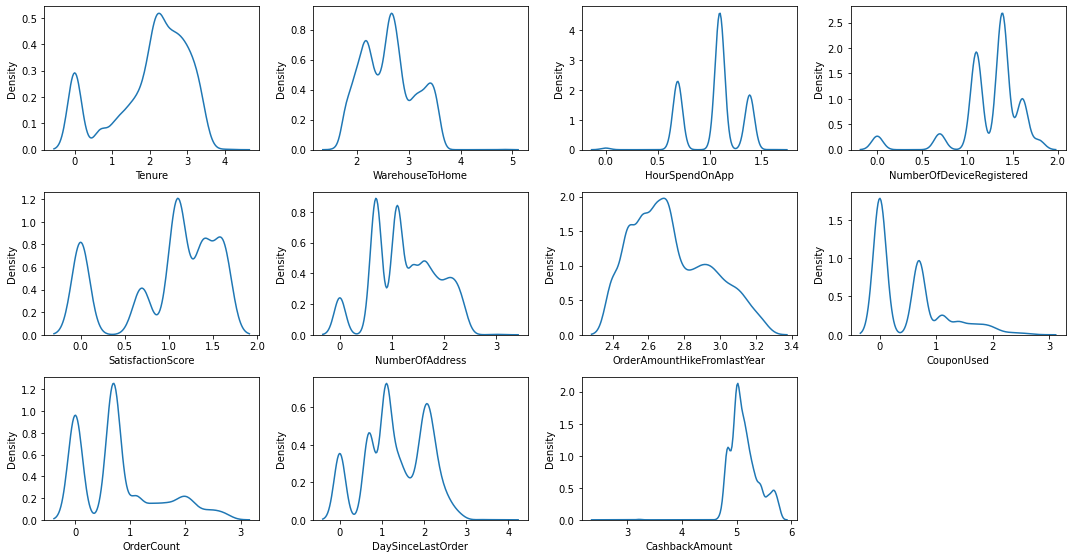

In [215]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_log[i])
    plt.tight_layout()

##### Data Outlier - STD

In [216]:
df5 = df4.copy()
df5_std = df5.copy()
for i in nums:
    df5_std[i] = StandardScaler().fit_transform(df5[i].values.reshape(len(df5), 1))

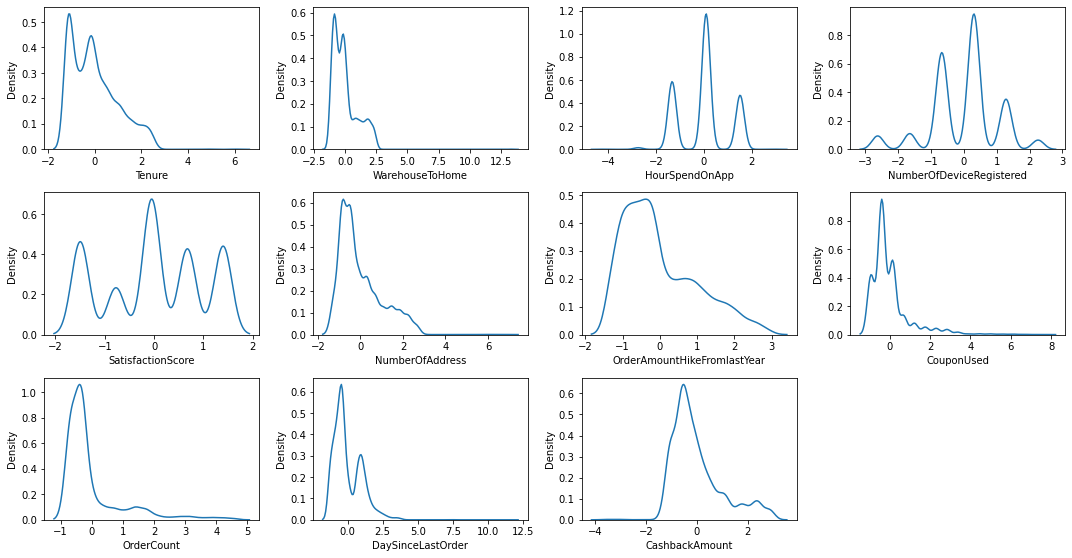

In [217]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_std[i])
    plt.tight_layout()

##### Data Outlier - NORM

In [218]:
df5 = df4.copy()
df5_norm = df5.copy()
for i in nums:
    df5_norm[i] = MinMaxScaler().fit_transform(df5[i].values.reshape(len(df5), 1))

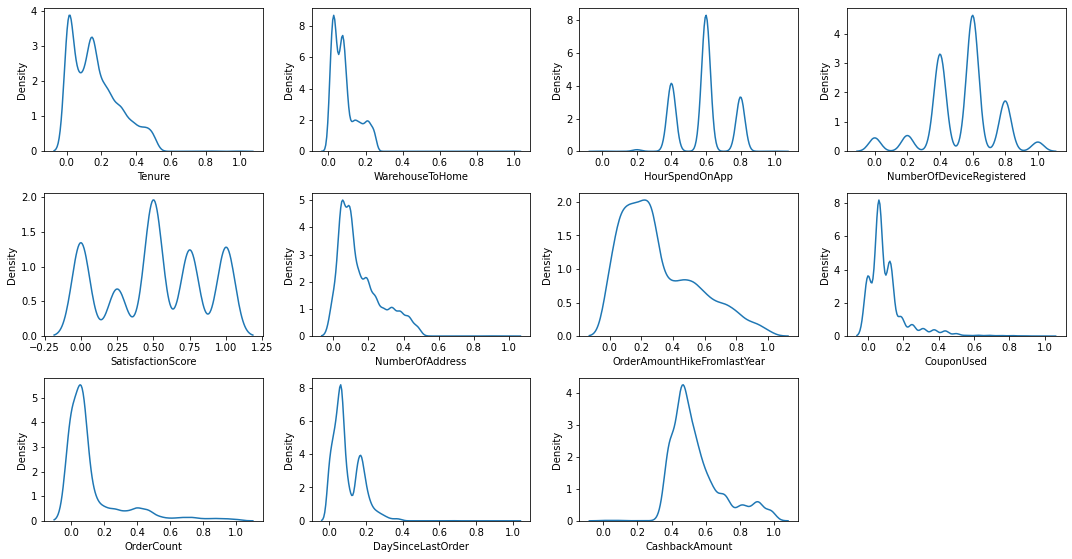

In [219]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_norm[i])
    plt.tight_layout()

#### Data Remove by Z-Score

##### Plot Distribusi Data Numerik

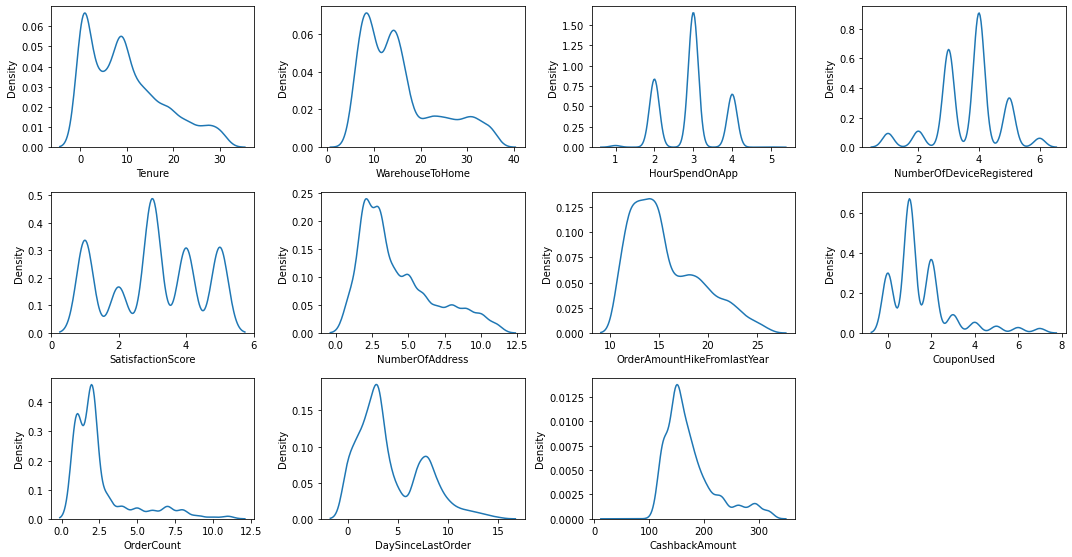

In [220]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df4_1[i]) #df4_1=data yang telah dibuang outlier menggunakan metode Z-Score
    plt.tight_layout()

##### Data Z-Socre - Log

In [221]:
df5_1 = df4_1.copy()
df5_1_log = df5_1.copy()
for i in nums:
    df5_1_log[i]=np.log(df5_1[i])

C:\Users\Taufan Adharsyah\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


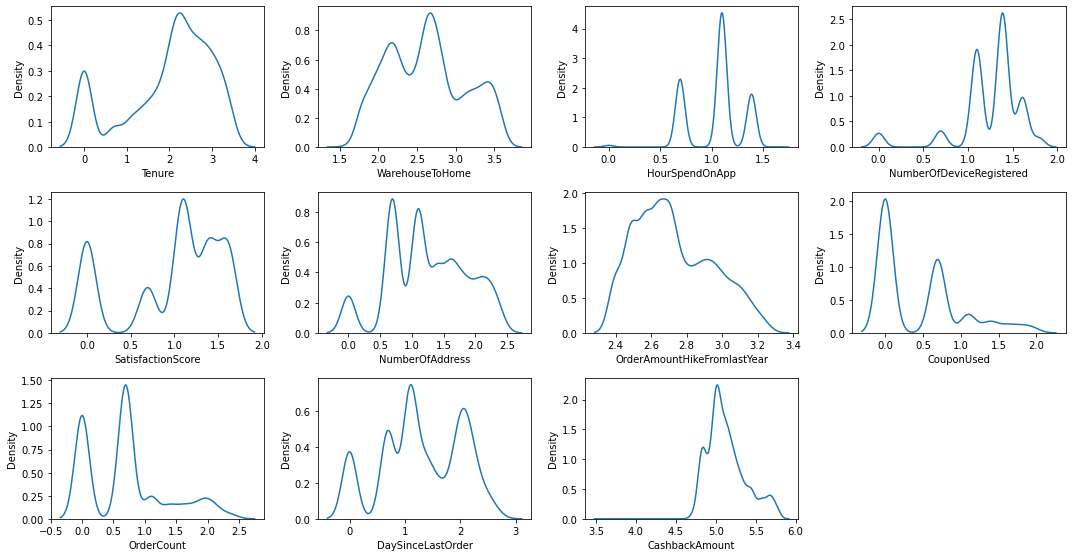

In [222]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_1_log[i])
    plt.tight_layout()

##### Data Z-Score - STD

In [223]:
df5_1 = df4_1.copy()
df5_1_std = df5_1.copy()
for i in nums:
    df5_1_std[i] = StandardScaler().fit_transform(df5_1[i].values.reshape(len(df5_1), 1))

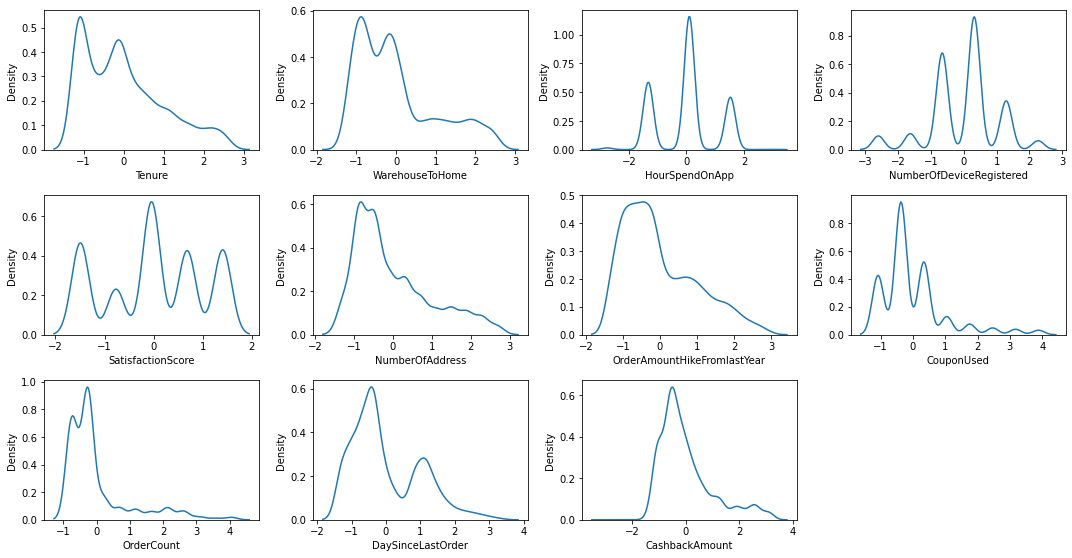

In [224]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_1_std[i])
    plt.tight_layout()

##### Data Z-Score - NORM

In [225]:
df5_1 = df4_1.copy()
df5_1_norm = df5_1.copy()
for i in nums:
    df5_1_norm[i] = MinMaxScaler().fit_transform(df5_1[i].values.reshape(len(df5_1), 1))

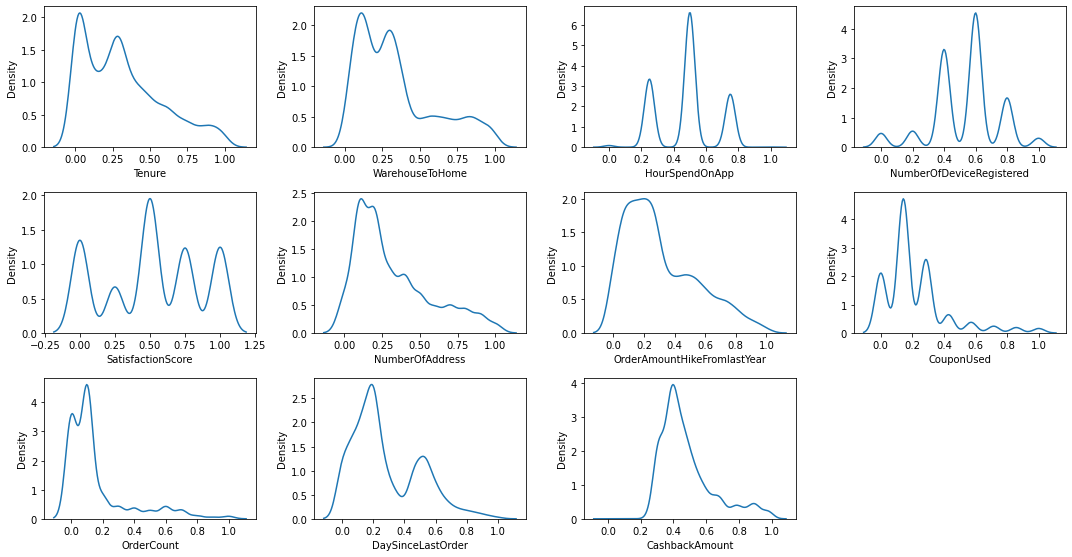

In [226]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_1_norm[i])
    plt.tight_layout()

#### Data Remove by IQR

##### Plot Distribusi Data Numerik

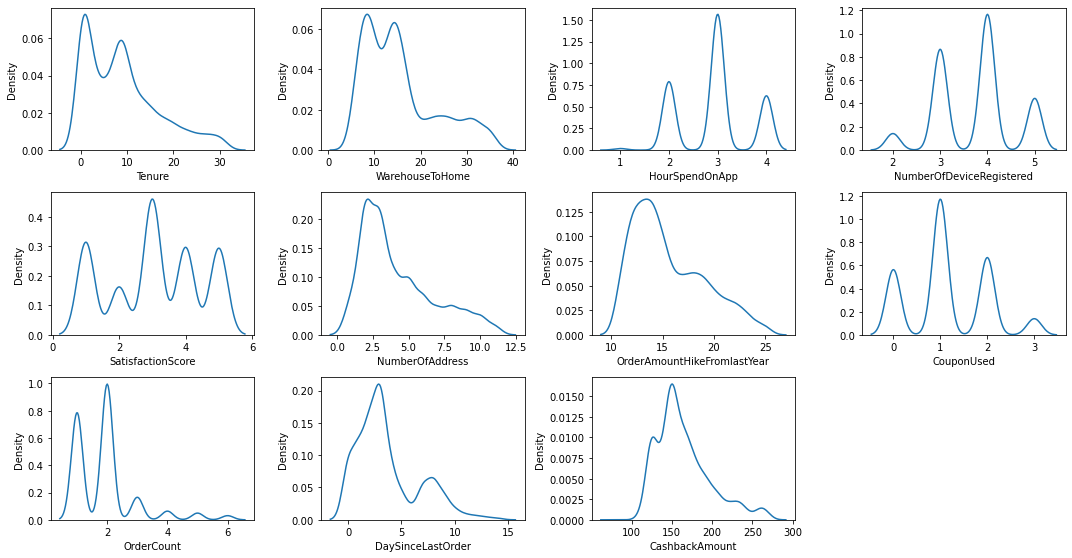

In [227]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df4_2[i])
    plt.tight_layout()

##### Data IQR - Log

In [228]:
df5_2 = df4_2.copy()
df5_2_log = df5_2.copy()
for i in nums:
    df5_2_log[i]=np.log(df5_2[i])

C:\Users\Taufan Adharsyah\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


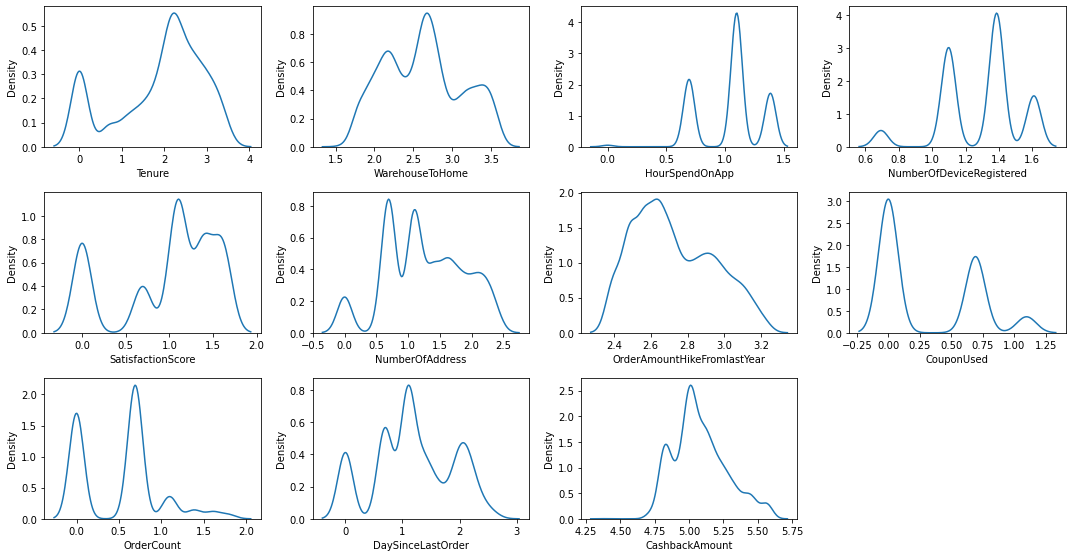

In [229]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_2_log[i])
    plt.tight_layout()

##### Data IQR - STD

In [230]:
df5_2 = df4_2.copy()
df5_2_std = df5_2.copy()
for i in nums:
    df5_2_std[i] = StandardScaler().fit_transform(df5_2[i].values.reshape(len(df5_2), 1))

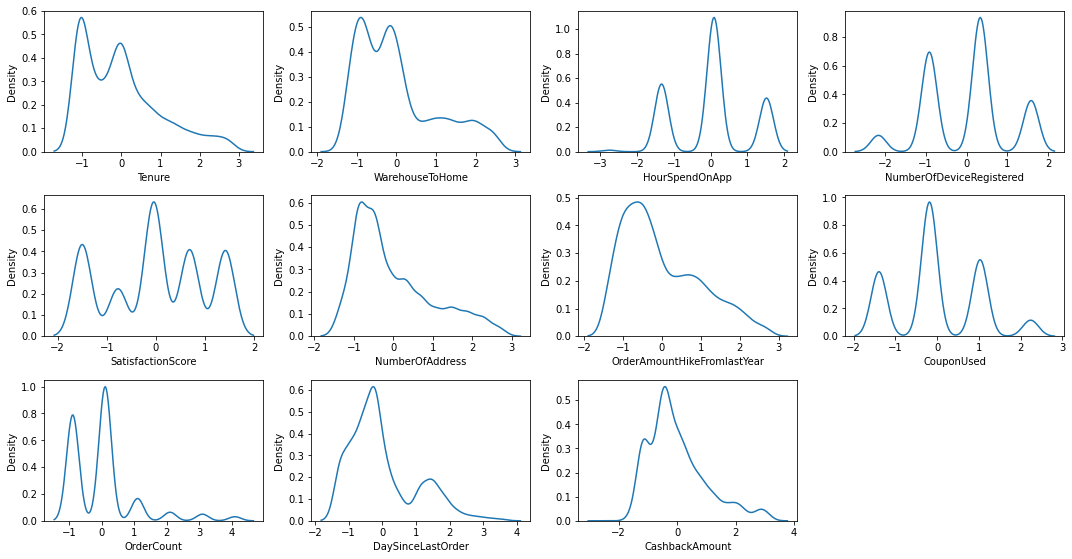

In [231]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_2_std[i])
    plt.tight_layout()

##### Data IQR - NORM

In [232]:
df5_2 = df4_2.copy()
df5_2_norm = df5_2.copy()
for i in nums:
    df5_2_norm[i] = MinMaxScaler().fit_transform(df5_2[i].values.reshape(len(df5_2), 1))

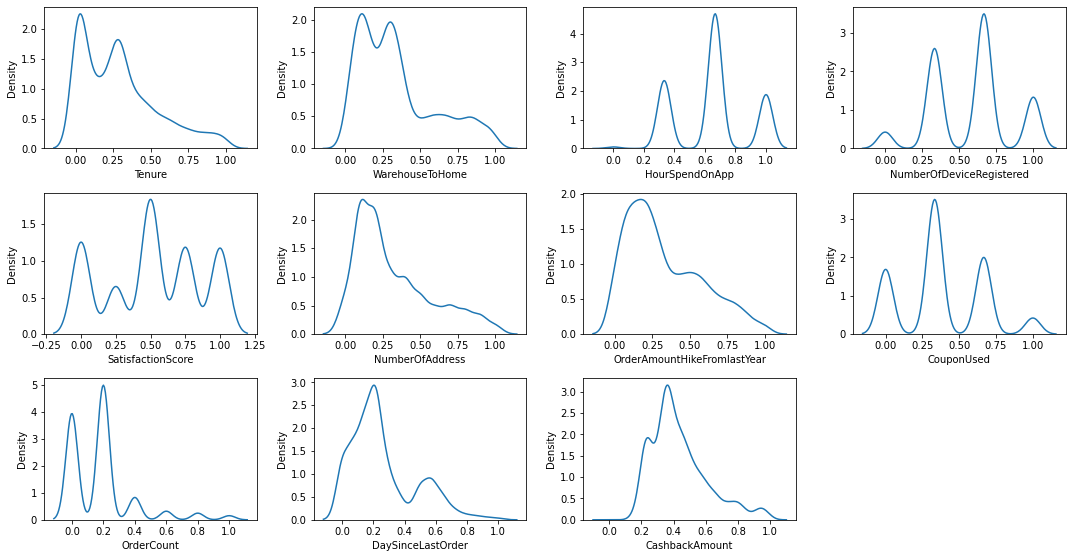

In [233]:
plt.figure(figsize=(15,10))
x=0
for i in nums:
    x+=1
    plt.subplot(4,4,x)
    sns.kdeplot(df5_2_norm[i])
    plt.tight_layout()

### 1.7. Handle Class Imbalance

#### Data Split & Resampling (Oversampling)
Imbalance Class terjadi pada target, dengan komposisi 83% Non-Churn dan 17% Churn. Penanganannya adalah menggunakan metode oversampling dengan algoritma random sampling.
<br>
<b>Pilihan data yang tersedia untuk split data adalah:
 - df4 : Data yang masih mengandung outlier, tanpa transformasi
 - df5_log: Data yang masih mengandung outlier, log transform
 - df5_std: Data yang masih mengandung outlier, standarisasi
 - df5_norm: Data yang masih mengandung outlier, normalisasi
 -
 - df4_1 : Data ourlier dibuang menggunakan metode z-score, tanpa transformasi
 - df5_1_log: Data ourlier dibuang menggunakan metode z-score, log transform
 - df5_1_std: Data ourlier dibuang menggunakan metode z-score, standarisasi
 - df5_1_norm: Data ourlier dibuang menggunakan metode z-score, normalisasi
 -
 - df4_2 : Data ourlier dibuang menggunakan metode IQR, tanpa transformasi
 - df5_2_log: Data ourlier dibuang menggunakan metode IQR, log transform
 - df5_2_std: Data ourlier dibuang menggunakan metode IQR, standarisasi
 - df5_2_norm: Data ourlier dibuang menggunakan metode IQR, normalisasi

In [340]:
# pilih data dari daftar yang tersedia
data=df5_1_log


# Split data function
x = data.drop(columns=['Churn'])
y = data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=259)


#Oversampling
x_train_over, y_train_over = over_sampling.RandomOverSampler(0.5).fit_resample(x_train, y_train)

print(f'Original Total Size: {y.shape[0]}')
print(f'Original Train Size: {y_train.shape[0]}')
print(f'Oversampled Train Size: {y_train_over.shape[0]}')
print(f'Test Size: {y_test.shape[0]}')
print('\n')
print('TOTAL TRAIN TARGET CLASS')
print(y.value_counts())
print('\n')
print('ORIGINAL TRAIN TARGET CLASS')
print(y_train.value_counts())
print('\n')
print('OVERSAMPLING TRAIN TARGET CLASS')
print(y_train_over.value_counts())
print('\n')
print('TEST TARGET COMPOSITION')
print(y_test.value_counts())

Original Total Size: 5350
Original Train Size: 4280
Oversampled Train Size: 5340
Test Size: 1070


TOTAL TRAIN TARGET CLASS
0    4438
1     912
Name: Churn, dtype: int64


ORIGINAL TRAIN TARGET CLASS
0    3560
1     720
Name: Churn, dtype: int64


OVERSAMPLING TRAIN TARGET CLASS
0    3560
1    1780
Name: Churn, dtype: int64


TEST TARGET COMPOSITION
0    878
1    192
Name: Churn, dtype: int64


## 2. Feature Engineering

### Correlation Analysis

CustomerID bisa di drop karena hanya merupakan row identifier.
<br>
Data yang digunakan untuk analisis heatmap adalah data original yang telah di imputasi pada missing value sebelum dilakukan transformasi.
<br>
Dari heatmap plot terlihat bahwa ada beberapa fitur yang memiliki korelasi dengan fitur lain. Kami coba mengambil treshold koefisien korelasi ABS(0.6), sehingga fitur-fitur yang berkorelasi antara lain:

 - OrderCount <> CouponUsed (+0.64)
 - MaritalStatus_Married <> MaritalStatus_Single (-0.73)

<br>
Dengan demikian, fitur yang di drop antara lain:

 - OrderCount
 - MaritalStatus_Married
 - CustomerID

Text(0.5, 1.0, 'Correlation Heatmap')

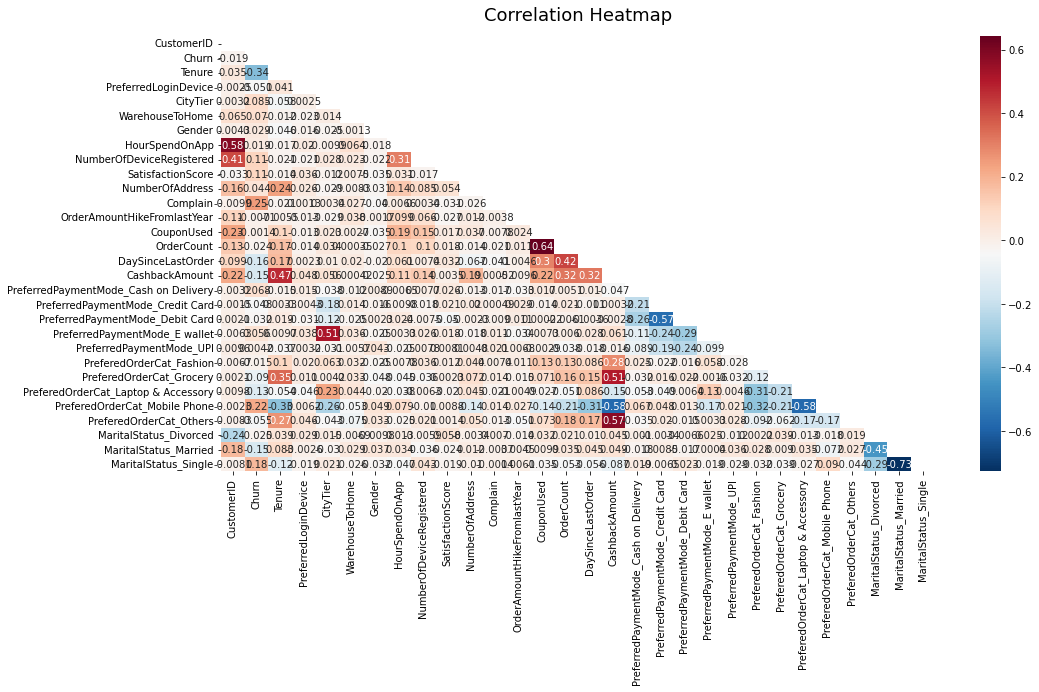

In [336]:
plt.figure(figsize=(16, 8))
mask = np.triu(np.ones_like(df3.corr(), dtype=np.bool))
heatmap = sns.heatmap(df3.corr(), mask=mask, annot=True, cmap='RdBu_r' )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### 2.1 Feature Selection

In [341]:
#daftar fitur redundan
drop_col=['OrderCount','MaritalStatus_Married','CustomerID']

#eksekusi drop fitur redundan/tidak dibutuhkan
x_train=x_train.drop(columns=drop_col)
x_test=x_test.drop(columns=drop_col)
x_train_over=x_train_over.drop(columns=drop_col)


In [343]:
x_train

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Single
1921,-inf,0,3,2.639057,1,0.693147,1.098612,0.000000,0.000000,0,...,0,1,0,0,0,1,0,0,0,0
316,2.197225,0,1,2.397895,1,1.098612,1.098612,1.098612,1.609438,0,...,0,0,1,0,0,0,1,0,1,0
2322,2.197225,0,1,3.465736,0,1.098612,1.386294,1.098612,0.693147,0,...,0,0,0,0,0,0,1,0,0,0
3128,2.197225,1,1,3.135494,1,1.386294,1.386294,1.098612,1.791759,1,...,1,0,0,1,0,0,0,0,1,0
3967,2.995732,1,1,2.197225,1,1.098612,1.386294,0.000000,2.197225,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2.833213,1,2,1.945910,0,0.693147,1.098612,0.000000,1.609438,1,...,1,0,0,0,0,0,1,0,0,0
4085,0.000000,0,3,3.496508,1,1.386294,1.386294,0.000000,1.098612,1,...,0,1,0,0,0,1,0,0,0,0
1152,2.944439,1,1,2.079442,1,0.693147,1.098612,0.000000,2.079442,1,...,0,0,0,0,0,0,0,1,0,0
4635,0.000000,1,3,3.555348,1,1.386294,1.386294,1.386294,1.098612,0,...,0,1,0,0,0,1,0,0,0,0


### 2.2. Feature Extraction

Fitur enginering tidak bisa dilakukan karena fitur baru yang terbentuk dari operasi matematika antara 2 fitur akan memiliki korelasi yang tinggi.

### 2.3. Add-ons Feature